##**Introduction**
In this notebook, we will explore the basics of the NEURON simulation environment and how to create a simple neuron model using Python. We will demonstrate how to create a soma with Hodgkin-Huxley channels and inject current to observe its membrane potential over time.
 
 
###Creating a Soma
We create a soma using the h.Section() function and give it a name. We set the soma's length and diameter to 10 μm.
 
###Inserting Channels
We insert Hodgkin-Huxley channels in the soma using soma.insert(h.hh).
 
###Stimulating the Neuron
We create an IClamp object and attach it to the center of the soma (soma(0.5)). We set the delay, duration, and amplitude of the stimulus.
 
###Running the Simulation
We define vectors to record time and voltage (t and v). We initialize the membrane potential to -65 mV using h.finitialize(). Finally, we run the simulation for 10 ms using h.continuerun().
 
###Plotting the Results
We plot the recorded voltage over time using matplotlib.pyplot.

In [ ]:
!pip install neuron

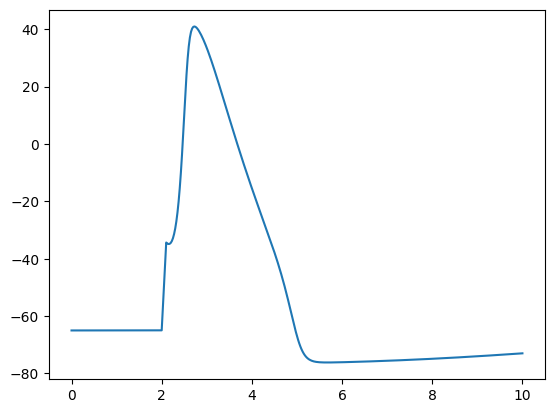

In [3]:
# Importing necessary libraries and modules
from neuron import h
from neuron.units import ms, mV, um
import matplotlib.pyplot as plt
 
# Loading external NEURON simulation file
h.load_file("stdrun.hoc")
 
# Defining soma section and setting its length and diameter
soma = h.Section(name='soma')
soma.L = soma.diam = 10 * um
 
# Inserting Hodgkin-Huxley channels into the soma section
soma.insert(h.hh)
 
# Creating an IClamp object and attaching it to the center of the soma section
ic = h.IClamp(soma(0.5))
ic.delay = 2 * ms
ic.dur = 0.1 * ms
ic.amp = 1
 
# Record the time and voltage values of the soma section
t = h.Vector().record(h._ref_t)
v = h.Vector().record(soma(0.5)._ref_v)
 
# Initialize the membrane potential of the soma section
h.finitialize(-65 * mV)
 
# Run the simulation for a total of 10 milliseconds
h.continuerun(10 * ms)
 
# Plot the time and voltage values of the soma section
plt.plot(t, v)
plt.show()